# Assignment 10

## Preparations

### Installing PyDrive

### Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DataFolder_Path = "/content/gdrive/MyDrive/EETBS /Data"

### Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

#### Finding the Files we need

In [ ]:
ConsumptionFilePath = os.path.join(DataFolder_Path,ConsumptionFileName)
TemperatureFilePath  = os.path.join(DataFolder_Path,TemperatureFileName)
IrradianceFilePath = os.path.join(DataFolder_Path,IrradianceFileName)

#### Importing the Datasets as Data Frames

In [ ]:
DF_consumption = pd.read_csv(ConsumptionFilePath,sep=",", index_col=0, parse_dates=[0])

DF_weather = pd.read_csv(TemperatureFilePath,sep=";",index_col = ["localhour"],parse_dates=["localhour"],
                         date_parser= lambda col: pd.to_datetime(col, utc=True).tz_convert("US/Central").tz_localize(None)) 
DF_temperature = DF_weather[["temperature"]]

DF_irradiance = pd.read_csv(IrradianceFilePath,sep=";", index_col=["localhour"], parse_dates=["localhour"])
DF_irradiance = DF_irradiance[["gen"]]
DF_irradiance.loc[DF_irradiance["gen"]<0,"gen"]=0

## Joining the DataFrames!

In [ ]:
DF_joined  = DF_consumption.join([DF_temperature,DF_irradiance])

DF_joined = DF_joined.rename(columns ={"air conditioner_5545":"Consumption [W]","temperature":"Temperature [°K]","gen":"Irradiance [??]"})

#### Handling NAN values

In [ ]:
DF_joined.dropna(inplace = True)

In [ ]:
Joined_DF_FileName= "joined_DF.csv"
Joined_DF_FilePath = os.path.join(DataFolder_Path,Joined_DF_FileName)
DF_joined.to_csv(Joined_DF_FilePath)

## Point A: Plots

### Data

In [ ]:
DF_joined.head()

,Consumption [W],Temperature [°K],Irradiance [??]
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583
2014-01-01 09:00:00,0.0,45.85,2.097700
2014-01-01 10:00:00,0.0,51.42,3.036750


In [ ]:
PlotA_consumption = DF_joined[["Consumption [W]"]]["2014-07-10 08:00:00":"2014-07-10 21:00:00"]
PlotA_temperature = DF_joined[["Temperature [°K]"]]["2014-07-10 08:00:00":"2014-07-10 21:00:00"]
PlotA_irradiance = DF_joined[["Irradiance [??]"]]["2014-07-10 08:00:00":"2014-07-10 21:00:00"]

### Plots

<Figure size 2000x1000 with 0 Axes>

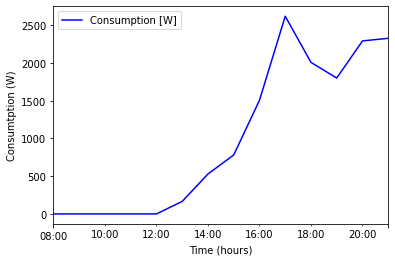

In [ ]:
plt.figure(dpi=200,figsize=[10,5])
PlotA_consumption.plot(color="blue")
plt.xlabel("Time (hours)")
plt.ylabel("Consumtption (W)")

figName  = "Consumption July (Tomas).jpg"
figuresFolderPath="/content/gdrive/MyDrive/EETBS /Figures"
Fig_FilePath = os.path.join(figuresFolderPath,figName)
plt.savefig(Fig_FilePath)

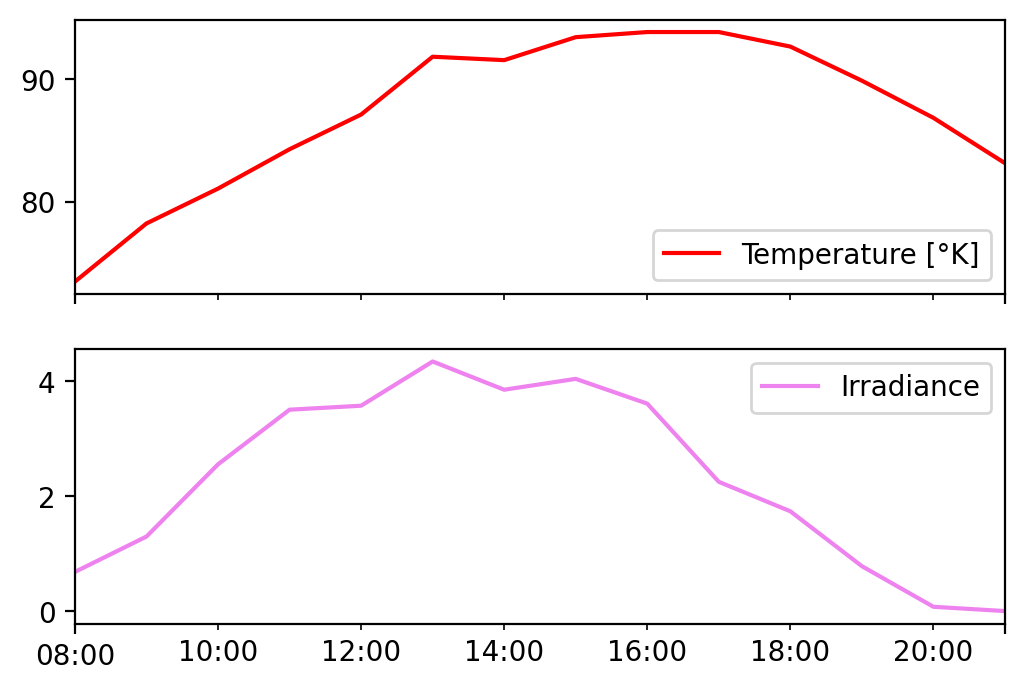

In [ ]:
DF_joined_Selected = DF_joined.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]
fig,axs = plt.subplots(2,1, dpi=200,sharex=True)
DF_joined_Selected[["Temperature [°K]"]].plot(ax=axs[0],color="red")
axs[0].legend(["Temperature [°K]"])
DF_joined_Selected[["Irradiance [??]"]].plot(ax=axs[1],color="violet")
axs[1].legend(["Irradiance"])

figName  = "Temperature vs Irradiance July (Tomas).jpg"
figuresFolderPath="/content/gdrive/MyDrive/EETBS /Figures"
Fig_FilePath = os.path.join(figuresFolderPath,figName)
plt.savefig(Fig_FilePath)

## Point B: New Consumption Data Frame

In [ ]:
DF_joined["Hours"] = DF_joined.index.hour
DF_joined["Day of the Week"] = DF_joined.index.isocalendar().day # Monday is 1
DF_joined["Month"] = DF_joined.index.month
DF_joined["Week of the Year"] = DF_joined.index.isocalendar().week # I don't understand why but this function considers the last three days of the years as part of the first week of the following year
DF_joined["Weekend Flag"] = np.where(DF_joined.index.dayofweek<5,0,1)

DF_joined.tail(60)

,Consumption [W],Temperature [°K],Irradiance [??],Hours,Day of the Week,Month,Week of the Year,Weekend Flag
2014-12-28 13:00:00,0.0,43.27,1.021800,13,7,12,52,1
2014-12-28 14:00:00,0.0,44.24,1.099583,14,7,12,52,1
2014-12-28 15:00:00,0.0,44.94,0.875217,15,7,12,52,1
2014-12-28 16:00:00,0.0,45.03,1.388950,16,7,12,52,1
2014-12-28 17:00:00,0.0,45.94,0.221383,17,7,12,52,1
2014-12-28 18:00:00,0.0,42.84,0.000000,18,7,12,52,1
2014-12-28 19:00:00,0.0,39.32,0.000000,19,7,12,52,1
2014-12-28 20:00:00,0.0,37.55,0.000000,20,7,12,52,1
2014-12-28 21:00:00,0.0,36.39,0.000000,21,7,12,52,1
2014-12-28 22:00:00,0.0,35.23,0.000000,22,7,12,52,1
